In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
import importlib
import plotting_utils
import utils
import euler_utils
importlib.reload(plotting_utils)
importlib.reload(utils)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


<module 'utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/utils.py'>

In [3]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'

In [4]:
data_global = euler_utils.read_output(work_folder + 'global_average', last_iter=60)


100%|██████████| 61/61 [00:41<00:00,  1.48it/s]


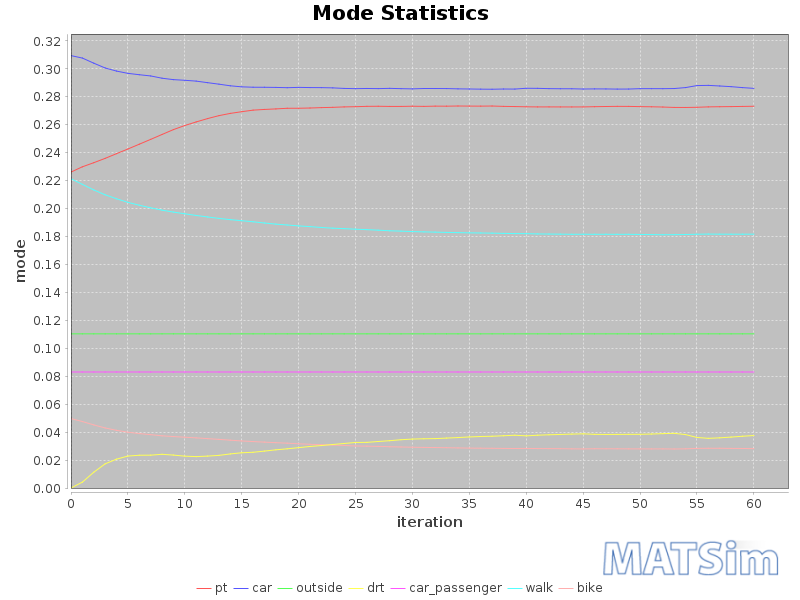

In [5]:
display(plotting_utils.show_modeshare(work_folder + 'global_average'))

count         mean          std         min         25%          50%  \
0  164211.0  2600.052069  2803.278755  250.030554  654.826589  1478.544012   

           75%          90%          95%           99%           max  
0  3494.551731  6608.459709  8704.701167  12555.021911  22045.733187

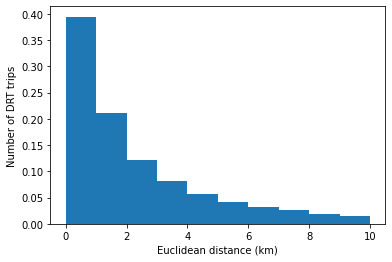

In [6]:
plotting_utils.plot_euclidean_distance_ditribution(data_global, iteration=-1)

In [7]:
start_time = 6
end_time = 24
bin_duration_min = 30
min_distance = 0
max_distance = 10000
bin_distance_m = 1000

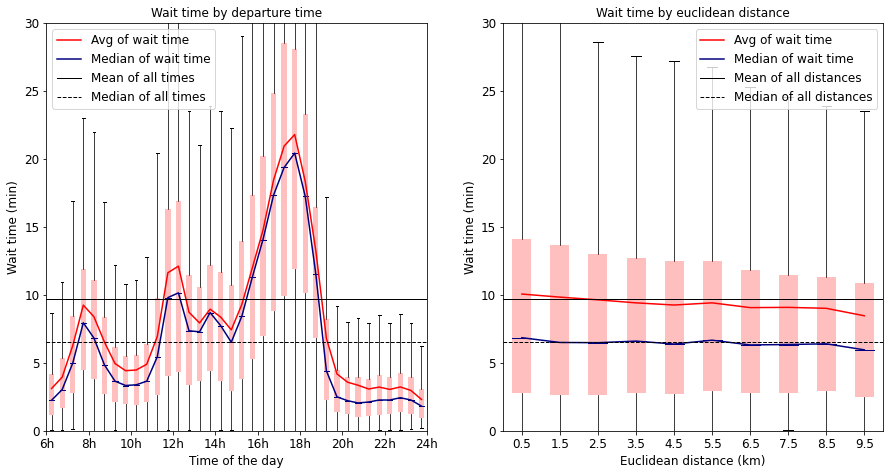

In [8]:
plotting_utils.plot_waiting_time(data_global, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
               filter_router_zeros=False, add_boxplots=True, ylim=30)

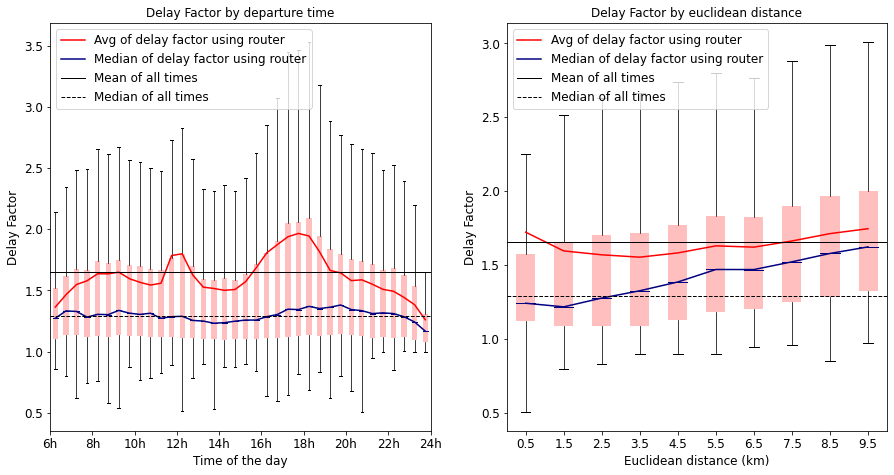

In [9]:
plotting_utils.plot_delay_factor(data_global, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
                plot_estimated=False, plot_using_sum=False, filter_router_zeros=False,
                                add_boxplots=True)

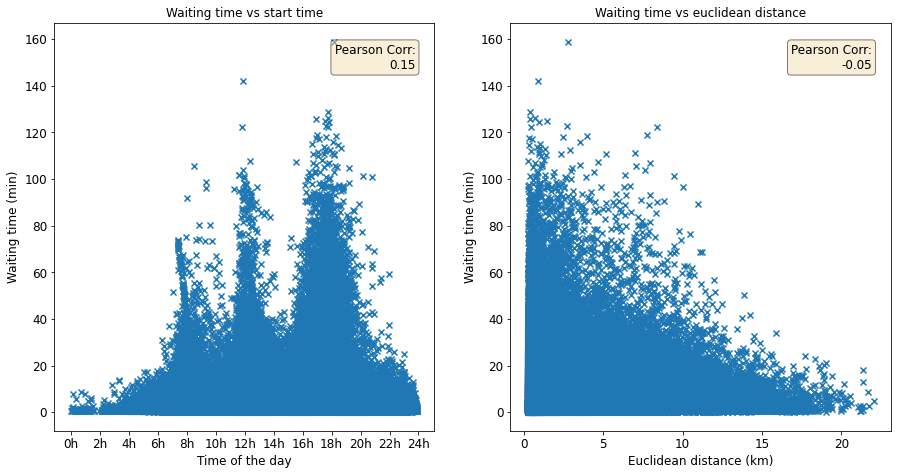

In [10]:
plotting_utils.plot_waiting_time_scatter(data_global)

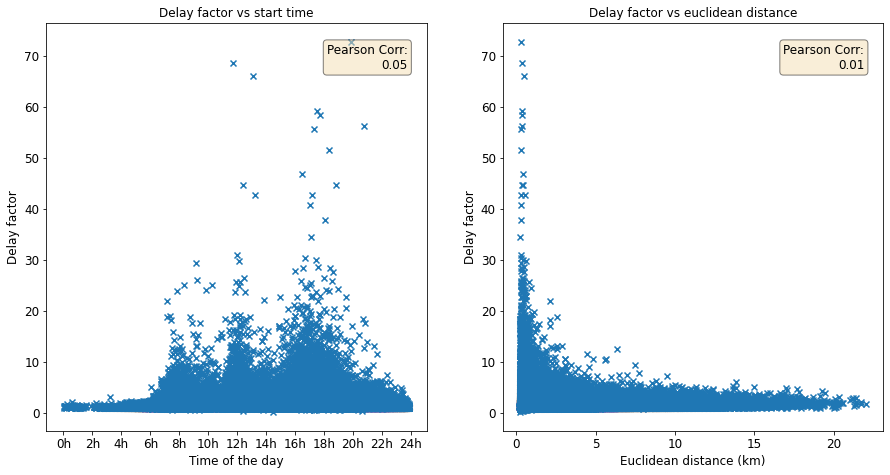

In [11]:
plotting_utils.plot_delay_factor_scatter(data_global)

We plot different time bins and distance bins (We can use the same parameters as before):

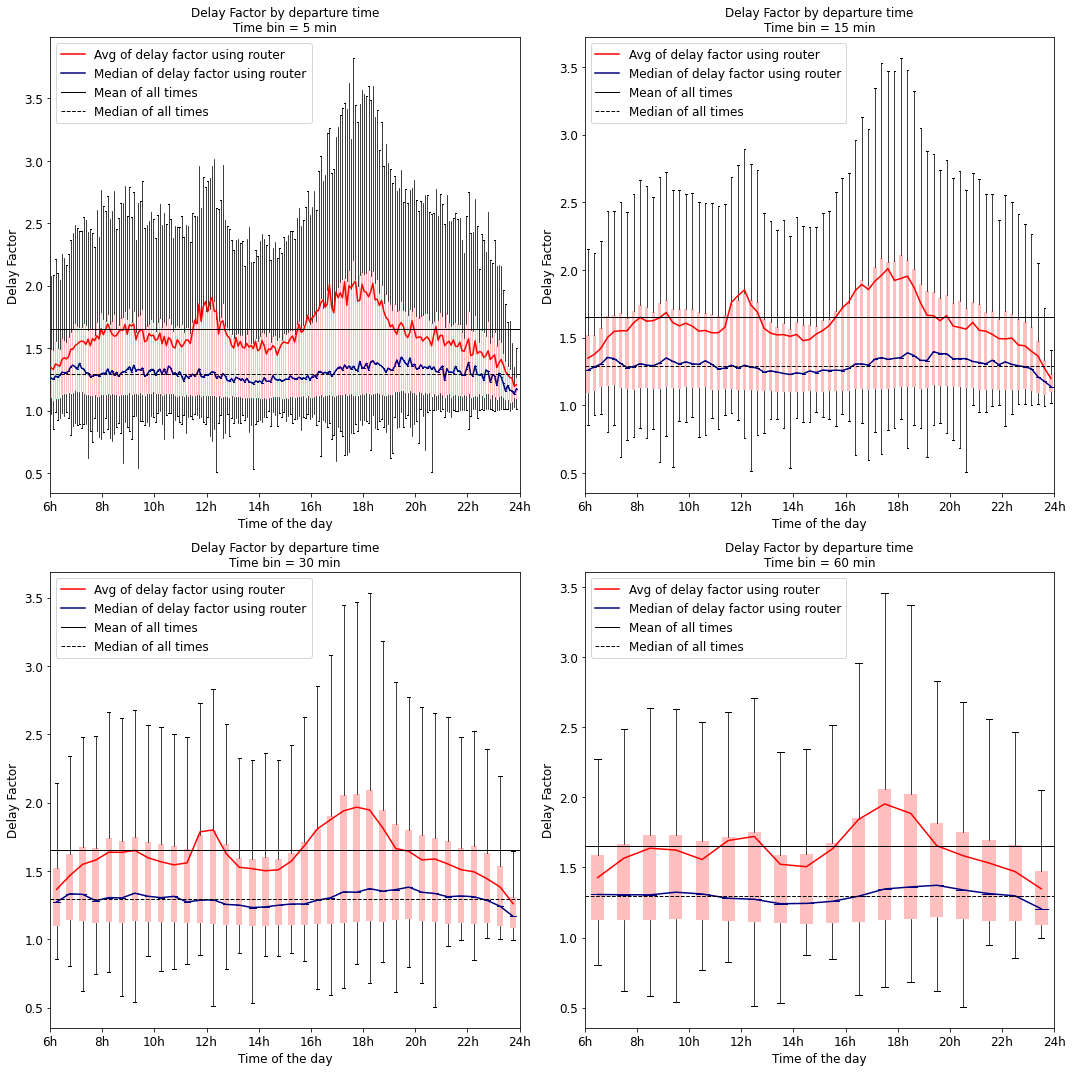

In [12]:
bin_durations_min = [5,15,30,60]
plotting_utils.plot_df_multiple_time_bins(
    data_global, start_time, end_time, bin_durations_min, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True)

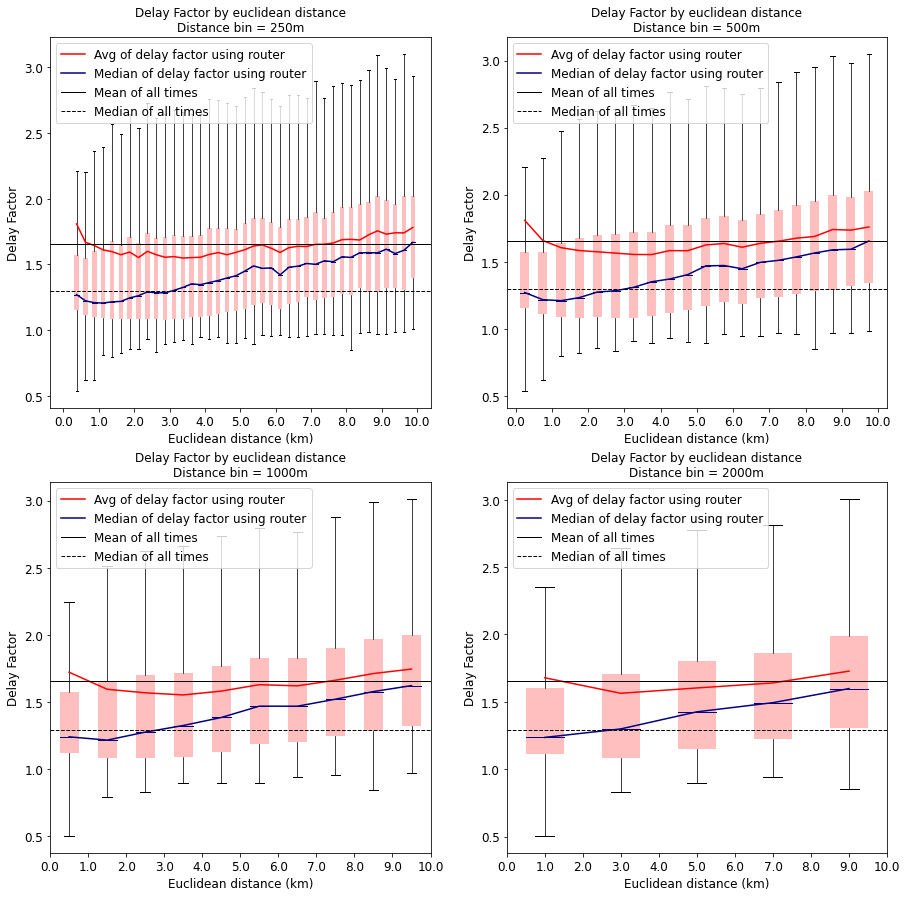

In [13]:
bin_distances_m = [250, 500, 1000, 2000]
plotting_utils.plot_df_multiple_distance_bins(
    data_global, min_distance, max_distance, bin_distances_m, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True)

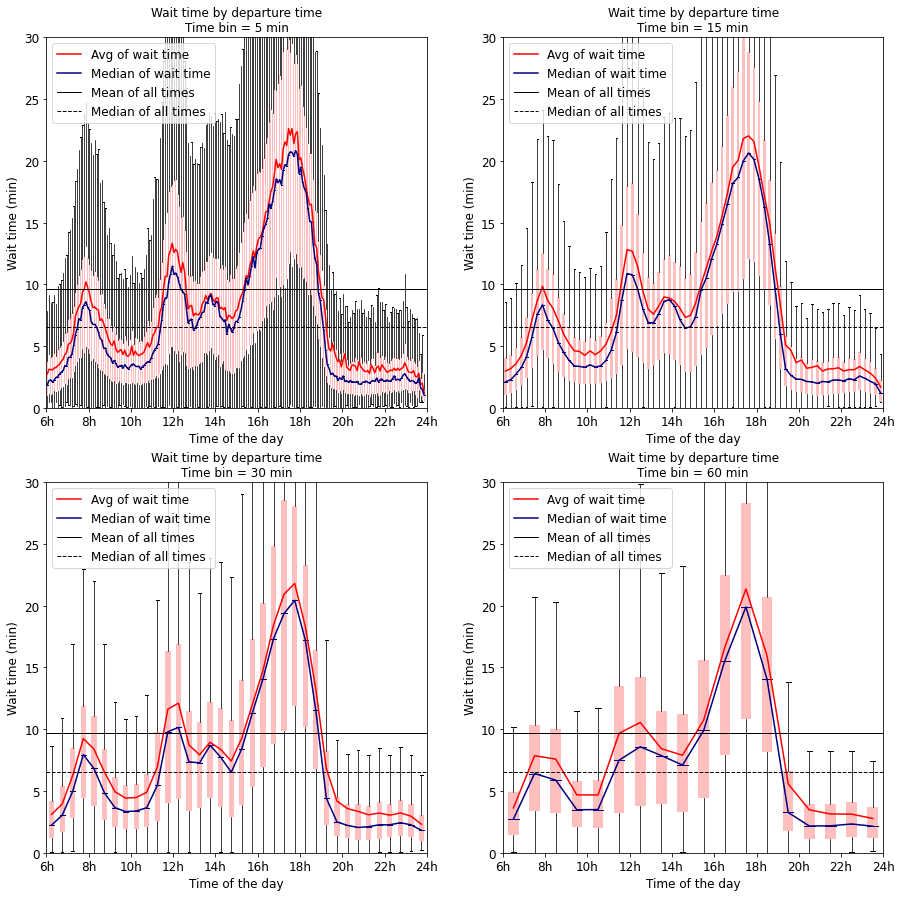

In [14]:
plotting_utils.plot_waiting_time_multiple_time_bins(
    data_global, start_time, end_time, bin_durations_min, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=30)

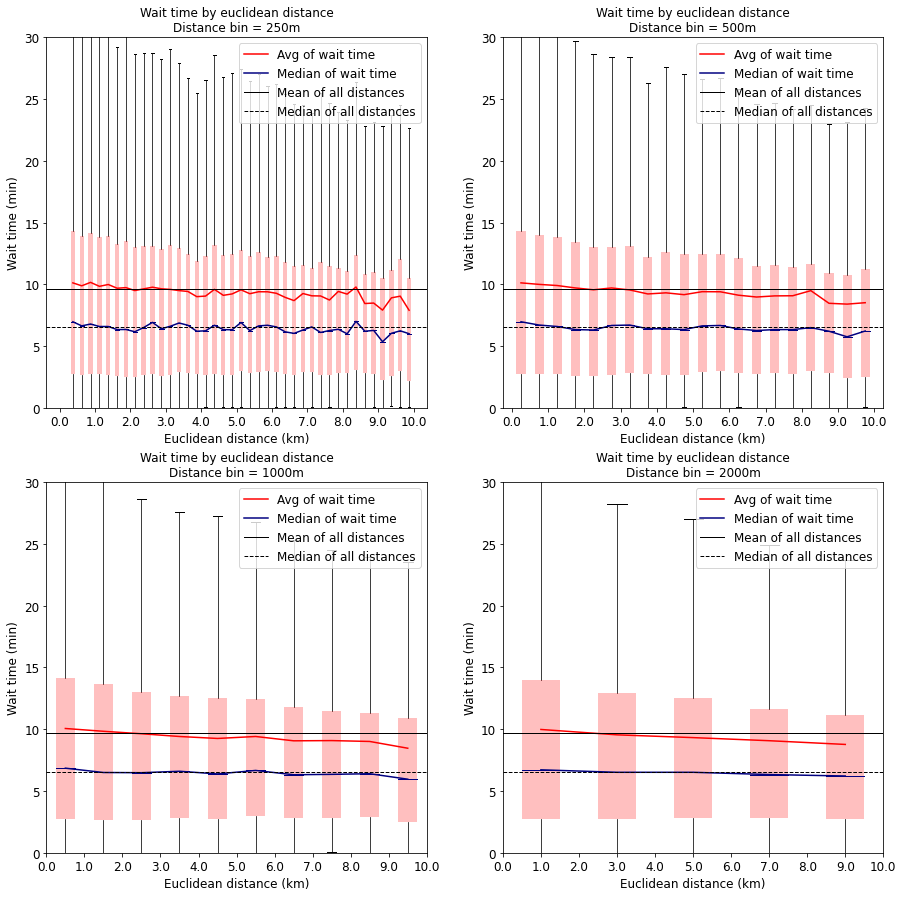

In [15]:
plotting_utils.plot_waiting_time_multiple_distance_bins(
    data_global, min_distance, max_distance, bin_distances_m, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=30)

In [16]:
lake_path = "/cluster/work/ivt_vpl/mfrancesc/lake/g1s20.shp"
zurich_districts_path = "/cluster/work/ivt_vpl/mfrancesc/city_districts/data/stzh.adm_stadtkreise_v.shp"
zurich_shp_path = '/cluster/work/ivt_vpl/mfrancesc/ScenarioBoundary/zurich_city_5km.shp'

Imputing 1621  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.18it/s]


Imputing 429  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 13.13it/s]


Imputing 198  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.05it/s]


Imputing 116  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.37it/s]


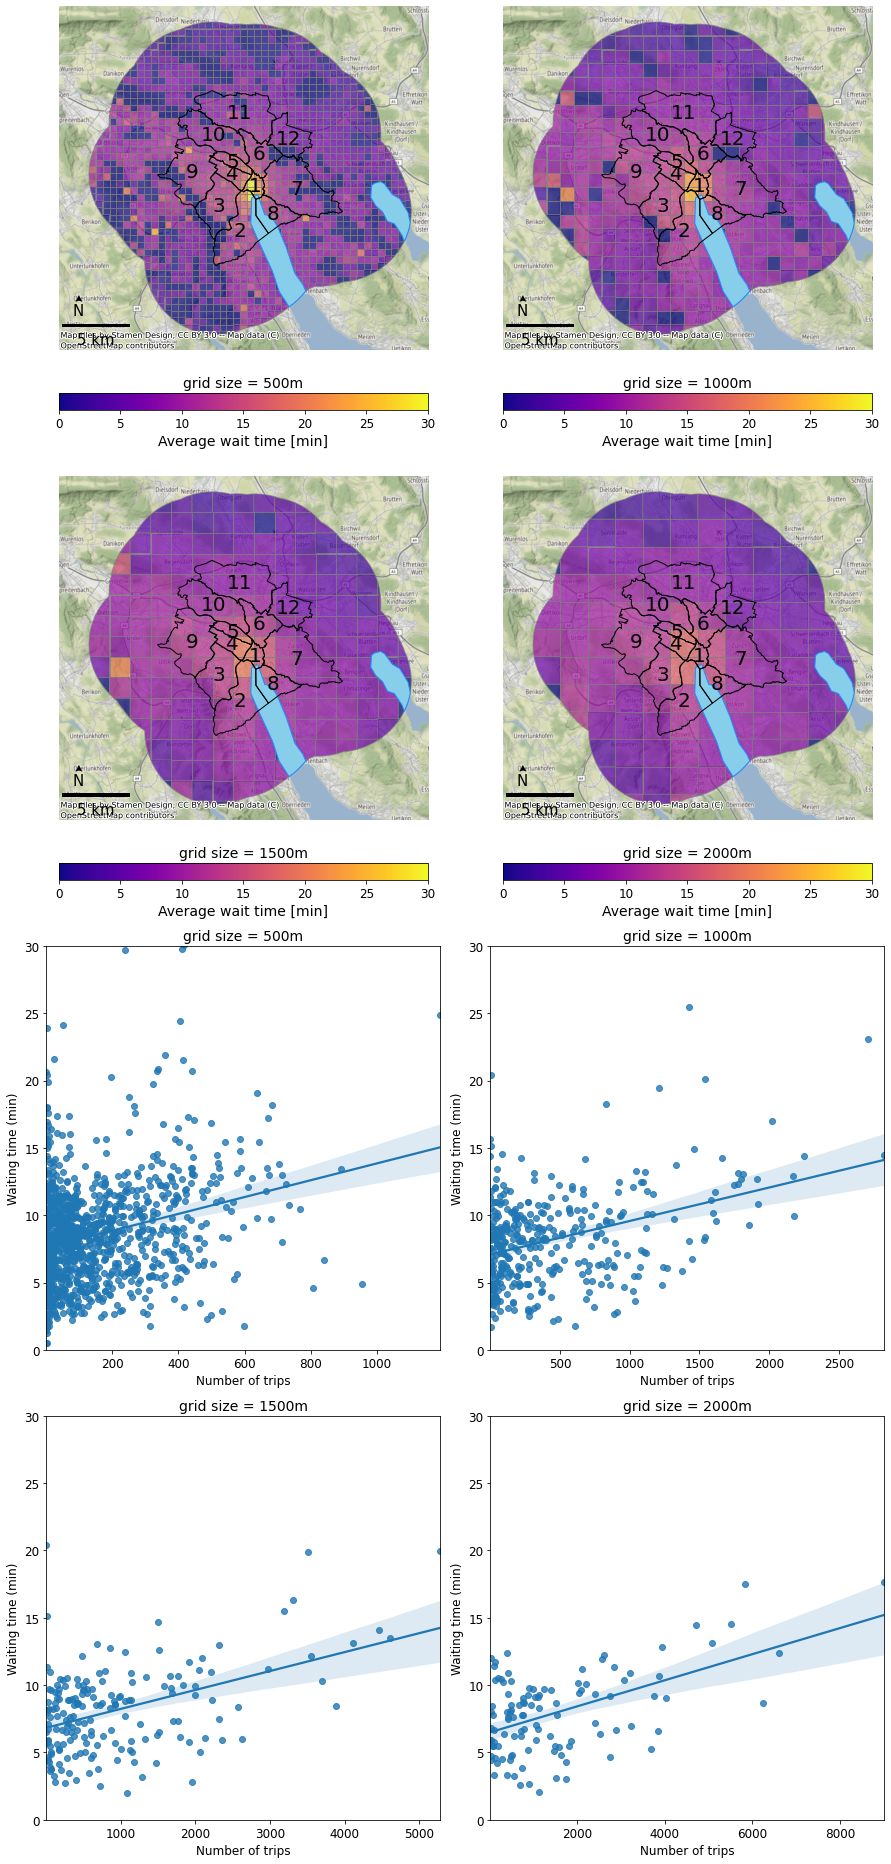

In [17]:
grid_sizes = [500,1000,1500,2000]
plotting_utils.plot_multigrid_wait_time(grid_sizes, data_global['drt_trips_stats'][-1], zurich_shp_path, 
                         lake_path, zurich_districts_path, map_limit=None, vmax=30)

In [18]:
euler_utils.compute_delay_factor_from_estimated(data_global['drt_trips_stats'])


100%|██████████| 61/61 [00:00<00:00, 756.57it/s]


Imputing 12  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.28it/s]


Imputing 12  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.39it/s]


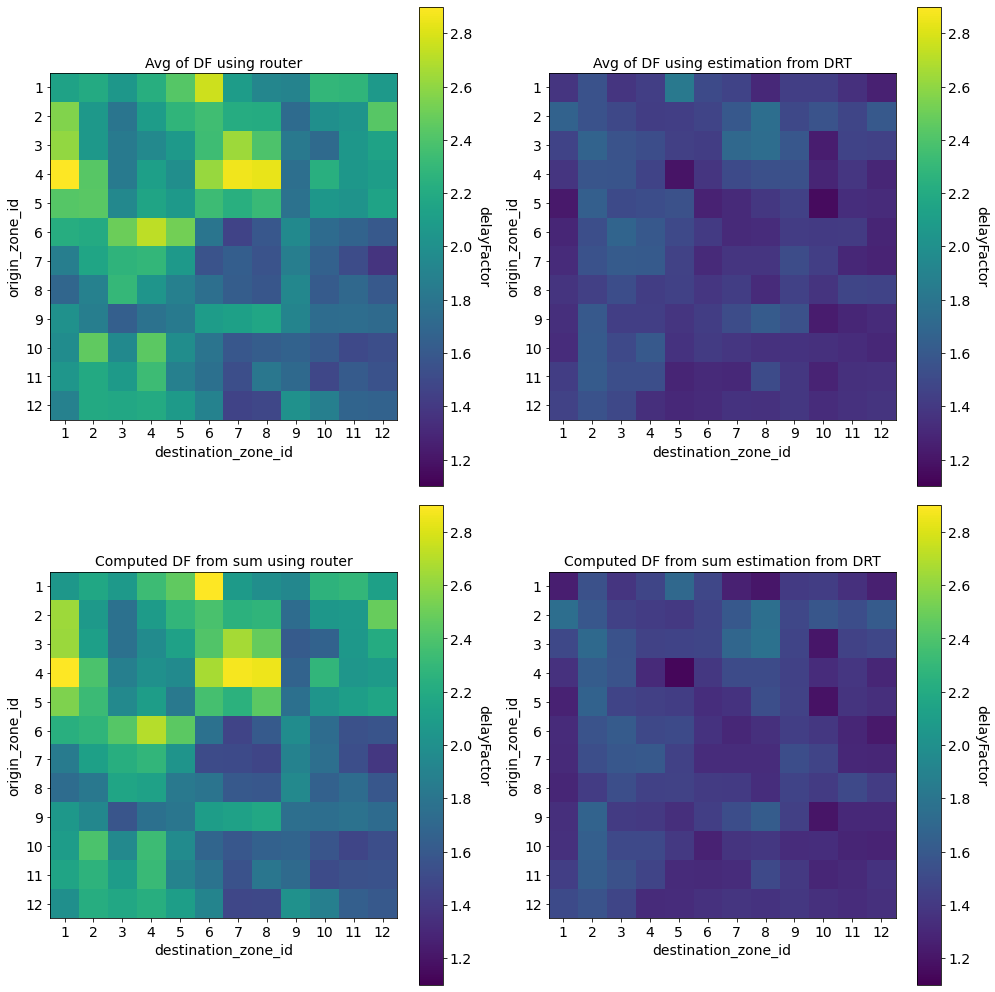

In [19]:
zones = plotting_utils.get_zurich_districts_gpd(zurich_districts_path)
plotting_utils.plot_OD_delayFactor_heatmaps(data_global['drt_trips_stats'][-1], 
                                            zones, "district_id", vmin=1.1,vmax=2.9)

Imputing 116  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 15.08it/s]


Imputing 116  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 15.11it/s]


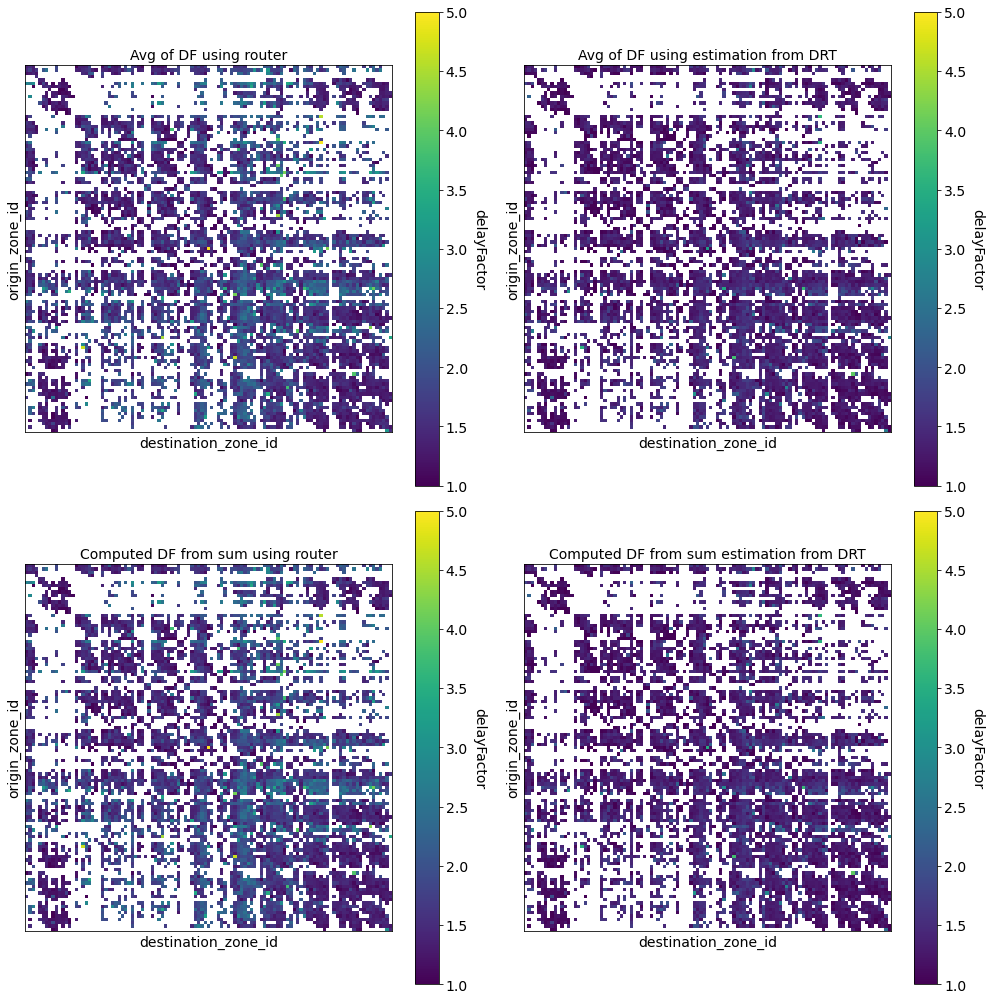

In [20]:
zones = utils.create_grid_from_shapefile(zurich_shp_path, 2000)
plotting_utils.plot_OD_delayFactor_heatmaps(data_global['drt_trips_stats'][-1], 
                                            zones, "grid_id", vmin=1, vmax=5)

In [21]:
print(plotting_utils.get_stats_table(data_global['drt_trips_stats'][-1]).to_latex())

\begin{tabular}{llr}
\toprule
                                  &     &          Value \\
\midrule
Number of rides & {} &  164211.000000 \\
Wait time (min) & Mean &       9.668589 \\
                                  & Median &       6.550000 \\
                                  & Std &      10.233444 \\
                                  & 75-percentile &      13.250000 \\
                                  & 99-percentile &      48.315000 \\
                                  & Max &     158.966667 \\
Travel time (min) & Mean &      13.162195 \\
                                  & Median &       7.616667 \\
                                  & Std &      15.633821 \\
                                  & 75-percentile &      16.433333 \\
                                  & 99-percentile &      78.216667 \\
                                  & Max &     232.366667 \\
Mean direct distance (km) &     &       2.600052 \\
Average detour factor (time wise) &     &       1.654527 \\
\bottomrule
\e

Imputing 1621  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.11it/s]


Imputing 429  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.21it/s]


Imputing 198  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 13.80it/s]


Imputing 116  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 13.88it/s]


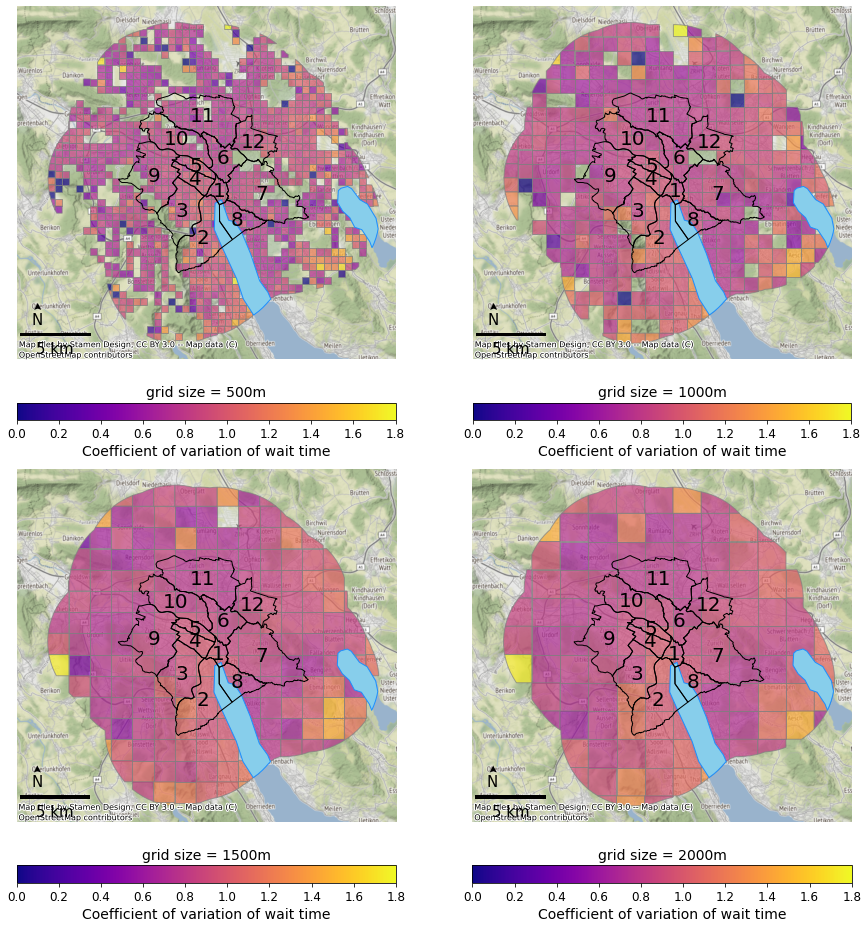

In [22]:
grid_sizes = [500,1000,1500,2000]
plotting_utils.plot_multigrid_wait_time_variation_coefficient(grid_sizes, data_global['drt_trips_stats'][-1], zurich_shp_path, 
                         lake_path, zurich_districts_path, map_limit=None, vmin=0, vmax=1.8)

Imputing 12  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 14.28it/s]


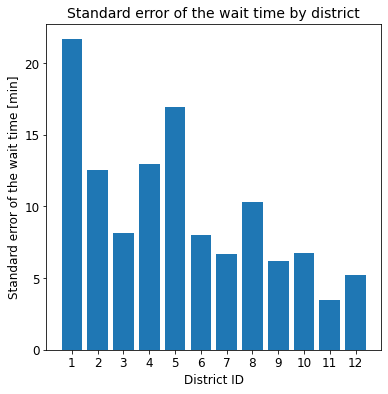

In [23]:
plotting_utils.plot_districts_wait_time_standard_error(data_global['drt_trips_stats'][-1], lake_path, zurich_districts_path)

In [24]:
TAZ_path = '/cluster/work/ivt_vpl/mfrancesc/TAZ_zurich_5km/TAZ_zurich_5km.shp'

Imputing 684  zones onto 164211  points by spatial join...


100%|██████████| 16/16 [00:01<00:00, 13.83it/s]


no. of trips outside the zones:  0


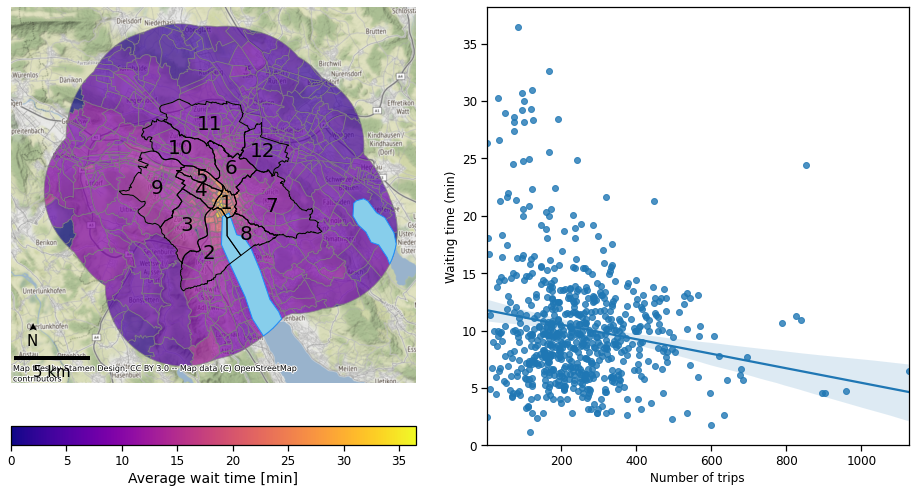

In [25]:
plotting_utils.plot_taz_zones_wait_time(data_global['drt_trips_stats'][-1], lake_path, TAZ_path, 'ID', zurich_districts_path)